In [1]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.rc('text', usetex = True)

from collections import defaultdict

In [2]:
movie_db_directory = "../datasets/tmdb/movie_db"

In [3]:
movies = []

with open(movie_db_directory, "r") as movie_data:
    lines = movie_data.readlines()
    
    for line in lines:
        movie_id, movie_title, movie_genres, movie_rating = json.loads(line)["id"], json.loads(line)["title"], json.loads(line)["genres"], json.loads(line)["rating"]
        movies.append({"id": movie_id, "title": movie_title, "genres": movie_genres, "rating": movie_rating})

        

In [4]:
len(movies)

901417

In [5]:
movies_df = pd.DataFrame(movies)
movies_df = movies_df[movies_df["rating"] > 0] # delete examples with no rating given
movies_df

,id,title,genres,rating
0,3924,Blondie,"[Comedy, Family]",7.063
2,8773,Love at Twenty,"[Drama, Romance]",6.674
3,25449,New World Disorder 9: Never Enough,[],6.000
5,2,Ariel,"[Drama, Comedy, Romance, Crime]",7.092
6,3,Shadows in Paradise,"[Drama, Comedy, Romance]",7.302
...,...,...,...,...
901234,1254866,Dark Side of the Moon,"[Horror, Western]",8.000
901240,1254875,Going,[Drama],6.000
901313,1254957,From Sound Check To Stage: Emergency Break,"[Music, Documentary]",10.000
901330,1254974,Vivante(s),"[Documentary, Drama]",6.000


In [6]:
movies_df[movies_df["genres"].map(len) == 13]

,id,title,genres,rating
860333,1205832,Macbeth: the death of Duncan,"[Action, Adventure, Comedy, Crime, Documentary...",10.0


In [7]:
# dictionary that keeps the count of movies that are  different number of genres
genres_count = defaultdict(int)

In [8]:
for count in movies_df["genres"].map(len):
    genres_count[count] += 1

In [9]:
print(json.dumps(genres_count, indent = 1))

{
 "2": 92973,
 "0": 42609,
 "4": 11137,
 "3": 44129,
 "1": 151680,
 "5": 2377,
 "6": 436,
 "7": 79,
 "8": 10,
 "9": 3,
 "12": 1,
 "10": 2,
 "11": 1,
 "13": 1
}


###### Distribution of number of tags assigned to every movie

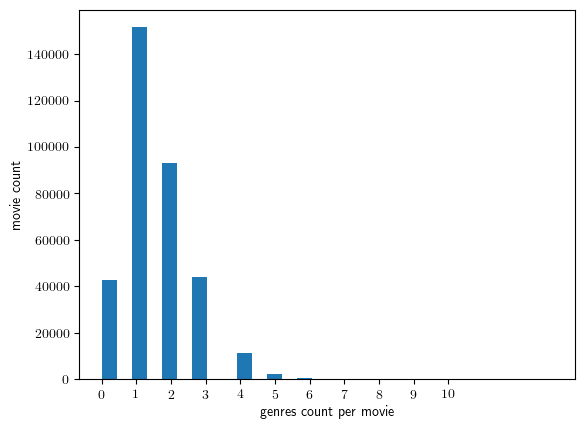

In [10]:
# histogram of number of tags, count number of genre in movies
plt.hist(movies_df["genres"].map(len), bins = 30)

plt.xticks(np.arange(0, 11, 1))

plt.xlabel("genres count per movie")
plt.ylabel("movie count")

plt.show()

###### Distribution of genres in the dataset

In [11]:
# dictionary that stores the count that each genre appears in the dataset
genres_dict = defaultdict(int)

In [12]:
for item in movies_df["genres"]:
    
    if len(item) == 0:
        genres_dict["NonGiven"] += 1
        
    else:
        for genre in item:
            genres_dict[genre] += 1
                

In [13]:
print(json.dumps(genres_dict, indent = 1))

{
 "Comedy": 78317,
 "Family": 16056,
 "Drama": 114907,
 "Romance": 32121,
 "NonGiven": 42609,
 "Crime": 21405,
 "Action": 27799,
 "Thriller": 30039,
 "Documentary": 51870,
 "Adventure": 15072,
 "Science Fiction": 12438,
 "Animation": 22337,
 "Mystery": 11879,
 "Horror": 26862,
 "Fantasy": 12276,
 "War": 6400,
 "Music": 20203,
 "Western": 4811,
 "History": 9087,
 "TV Movie": 15899
}


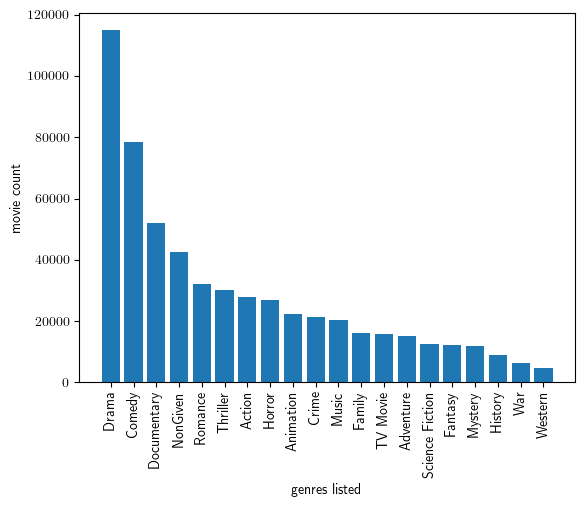

In [14]:
# sort the genres count dictionary by count in descending order and keep the respective keys
sorted_by_genres_count = sorted(genres_dict.items(), key = lambda x: x[1], reverse = True)
genres_list = [item[0] for item in sorted_by_genres_count]
count_list = [item[1] for item in sorted_by_genres_count]

# bar plot with tags, count number of genre in movies
plt.bar(genres_list, count_list)
plt.xticks(rotation = "vertical")

plt.xlabel("genres listed")
plt.ylabel("movie count")

plt.show()

###### Distribution of ratings in the dataset, all genres included

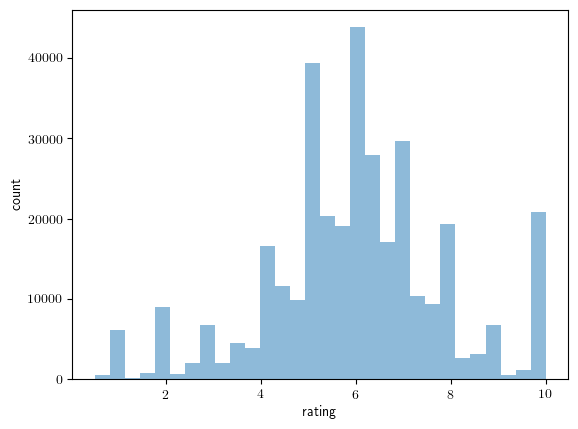

In [15]:
# distribution of ratings for all the movies with rating > 0
plt.hist(movies_df["rating"], bins = 30, alpha = 0.5)

plt.xlabel("rating")
plt.ylabel("count")

plt.show()

###### Map the movie ratings into 3 categories

In [16]:
mean_rating = movies_df["rating"].mean()
std_rating = movies_df["rating"].std()
max_rating = movies_df["rating"].max()

(mean_rating, std_rating)

(5.988384989491602, 1.8938617631837311)

In [20]:
# the rating column is bucketed into three different categories: below average (1), average (2), and above average (3)
# the intervals are defined using the mean and standard deviation of the distribution
# below average rating (1): 0 < rating < (mean - std)
# average rating (2): (mean - std) <= rating <= (mean + std)
# above average rating (3): (mean + std) < rating <= max_rating

movies_df["bucketed_rating"] = pd.cut(movies_df["rating"], 
                                      bins = [0, mean_rating - std_rating, mean_rating + std_rating, max_rating], 
                                      labels = [0, 1, 2])

movies_df.head()

,id,title,genres,rating,bucketed_rating
0,3924,Blondie,"[Comedy, Family]",7.063,1
2,8773,Love at Twenty,"[Drama, Romance]",6.674,1
3,25449,New World Disorder 9: Never Enough,[],6.000,1
5,2,Ariel,"[Drama, Comedy, Romance, Crime]",7.092,1
6,3,Shadows in Paradise,"[Drama, Comedy, Romance]",7.302,1


###### Distribution of rating for the 4 most popular genres ("Drama", "Comedy", "Documentary", "NonGiven")

In [21]:
def filterByGenre(genre):
    
    return movies_df[movies_df["genres"].map(lambda x: genre in x)]

In [22]:
movies_df_drama = filterByGenre("Drama")
movies_df_comedy = filterByGenre("Comedy")
movies_df_documentary = filterByGenre("Documentary")

# dataset filtered by non given genre
movies_df_nongiven = movies_df[movies_df["genres"].map(lambda x: x == [])]

# movies_df_nongiven

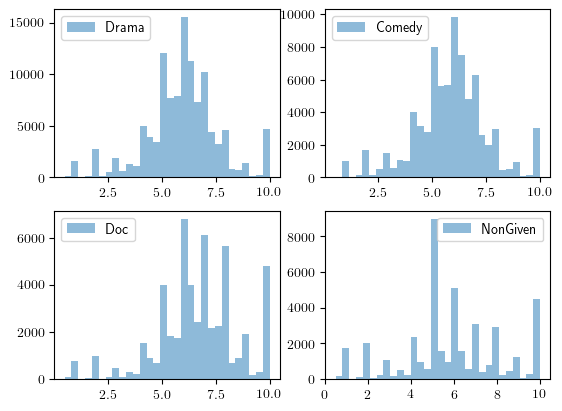

In [23]:
fig, axs = plt.subplots(nrows = 2, ncols = 2)
n_bins = 30

axs[0, 0].hist(movies_df_drama["rating"], bins = n_bins, alpha = 0.5)
axs[0, 0].legend(["Drama"], loc = "best")

axs[0, 1].hist(movies_df_comedy["rating"], bins = n_bins, alpha = 0.5)
axs[0, 1].legend(["Comedy"], loc = "best")

axs[1, 0].hist(movies_df_documentary["rating"], bins = n_bins, alpha = 0.5)
axs[1, 0].legend(["Doc"], loc = "best")

axs[1, 1].hist(movies_df_nongiven["rating"], bins = n_bins, alpha = 0.5)
axs[1, 1].legend(["NonGiven"], loc = "best")

plt.xticks(np.arange(0, 11, 2))

plt.show()

In [51]:
# plt.hist(movies_df_drama["rating"], bins = 30, alpha = 0.5)

# plt.xlabel("rating for genre 'Drama'")
# plt.ylabel("count")

# plt.show()

In [52]:
# plt.hist(movies_df_comedy["rating"], bins = 30, alpha = 0.5)

# plt.xlabel("rating for genre 'Comedy'")
# plt.ylabel("count")

# plt.show()

In [53]:
# plt.hist(movies_df_documentary["rating"], bins = 30, alpha = 0.5)

# plt.xlabel("rating for genre 'Documentary'")
# plt.ylabel("count")

# plt.show()

In [54]:
# plt.hist(movies_df_nongiven["rating"], bins = 30, alpha = 0.5)

# plt.xlabel("rating for genre 'NonGiven'")
# plt.ylabel("count")

# plt.show()

In [ ]:
# convert the lists of genres to strings and modify the "genres" column
movies_df["genres_str"] = ["|".join(map(str, l)) for l in movies_df["genres"]]
movies_df = movies_df.drop(columns = ["genres"], axis = 1)
movies_df

In [8]:
# number of movies with no listed genre
condition = movies_df["genres_str"].map(len) == 0
movies_df[condition]

,id,title,rating,genres_str
3,25449,New World Disorder 9: Never Enough,6.0,
422,538,Janine F.,5.0,
1863,2802,De Arm Van Jezus,0.0,
2045,3094,Elated By Night,0.0,
2144,3398,Rich and Scary: Independent Soap Movie Experience,0.0,
...,...,...,...,...
901410,1255058,Disney Parks Magical Christmas Day Parade,0.0,
901412,1255060,Imago,0.0,
901413,1255061,Justice League: TaskForce (Part One),0.0,
901414,1255062,Demon Castle,0.0,


In [61]:
# assign "NonGiven" to the movies with no listed genre
movies_df.loc[condition, "genres"] = "NonGiven"
movies_df

,id,title,genres,rating
0,3924,Blondie,"[Comedy, Family]",7.063
1,6124,"Peter Voss, Thief of Millions",[Adventure],0.000
2,8773,Love at Twenty,"[Drama, Romance]",6.674
3,25449,New World Disorder 9: Never Enough,NonGiven,6.000
4,31975,Sesame Street: Elmo Loves You!,[Family],0.000
...,...,...,...,...
901412,1255060,Imago,NonGiven,0.000
901413,1255061,Justice League: TaskForce (Part One),NonGiven,0.000
901414,1255062,Demon Castle,NonGiven,0.000
901415,1255063,"Grounds of Coherence #1, but this is the langu...",NonGiven,0.000
